In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/Users/victornneji/Documents/Data Science with Python/Course_Material/S_12_KNN/Coded_Data.csv", index_col=0)

In [6]:
df.head()

Cd_1  Cd_2  Cd_3  Cd_4  Cd_5  Cd_6  Cd_7  Cd_8  Cd_9  Cd_10 Result
1  53.1  63.4  33.0  46.2  47.3  21.2  44.3  36.1  46.6   65.0      Y
2  36.9  54.7  31.1  50.5  56.0  38.9  39.4  56.8  33.0   78.8      N
3  41.9  65.5  53.5  52.3  92.5  43.2  94.9  64.7  50.8   67.9      N
4  71.7  75.6  37.9  50.5  69.2  52.5  82.3  77.3  80.8   60.9      Y
5  74.3  51.8  36.4  40.9  74.7  42.2  65.1  36.2  77.6   74.9      Y

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cd_1    1000 non-null   float64
 1   Cd_2    1000 non-null   float64
 2   Cd_3    1000 non-null   float64
 3   Cd_4    1000 non-null   float64
 4   Cd_5    1000 non-null   float64
 5   Cd_6    1000 non-null   float64
 6   Cd_7    1000 non-null   float64
 7   Cd_8    1000 non-null   float64
 8   Cd_9    1000 non-null   float64
 9   Cd_10   1000 non-null   float64
 10  Result  1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 93.8+ KB


In [8]:
df.describe()

Cd_1         Cd_2         Cd_3        Cd_4         Cd_5  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean     55.160100    60.772100    48.424600    41.72640    62.568300   
std      16.822071    14.017291    16.924519    14.04612    14.752008   
min      10.100000    24.100000     9.900000     2.80000    19.100000   
25%      43.100000    51.400000    35.700000    31.50000    52.800000   
50%      54.650000    61.000000    47.200000    41.40000    62.750000   
75%      67.600000    71.300000    59.700000    51.02500    72.600000   
max     100.000000   100.000000   100.000000   100.00000   100.000000   

              Cd_6         Cd_7         Cd_8         Cd_9        Cd_10  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     56.610000    56.234600    60.044600    61.428300    71.955300  
std      15.363676    14.890992    16.186116    15.574547    10.782696  
min      15.700000    17.200000    16.800000    19.400000    33.800000  
25%      45.675000    45.800000    48.500000    49.575000    64.575000  
50%      56.500000    55.200000    59.700000    61.800000    72.600000  
75%      67.400000    66.225000    71.900000    73.325000    79.500000  
max     100.000000   100.000000   100.000000   100.000000   100.000000

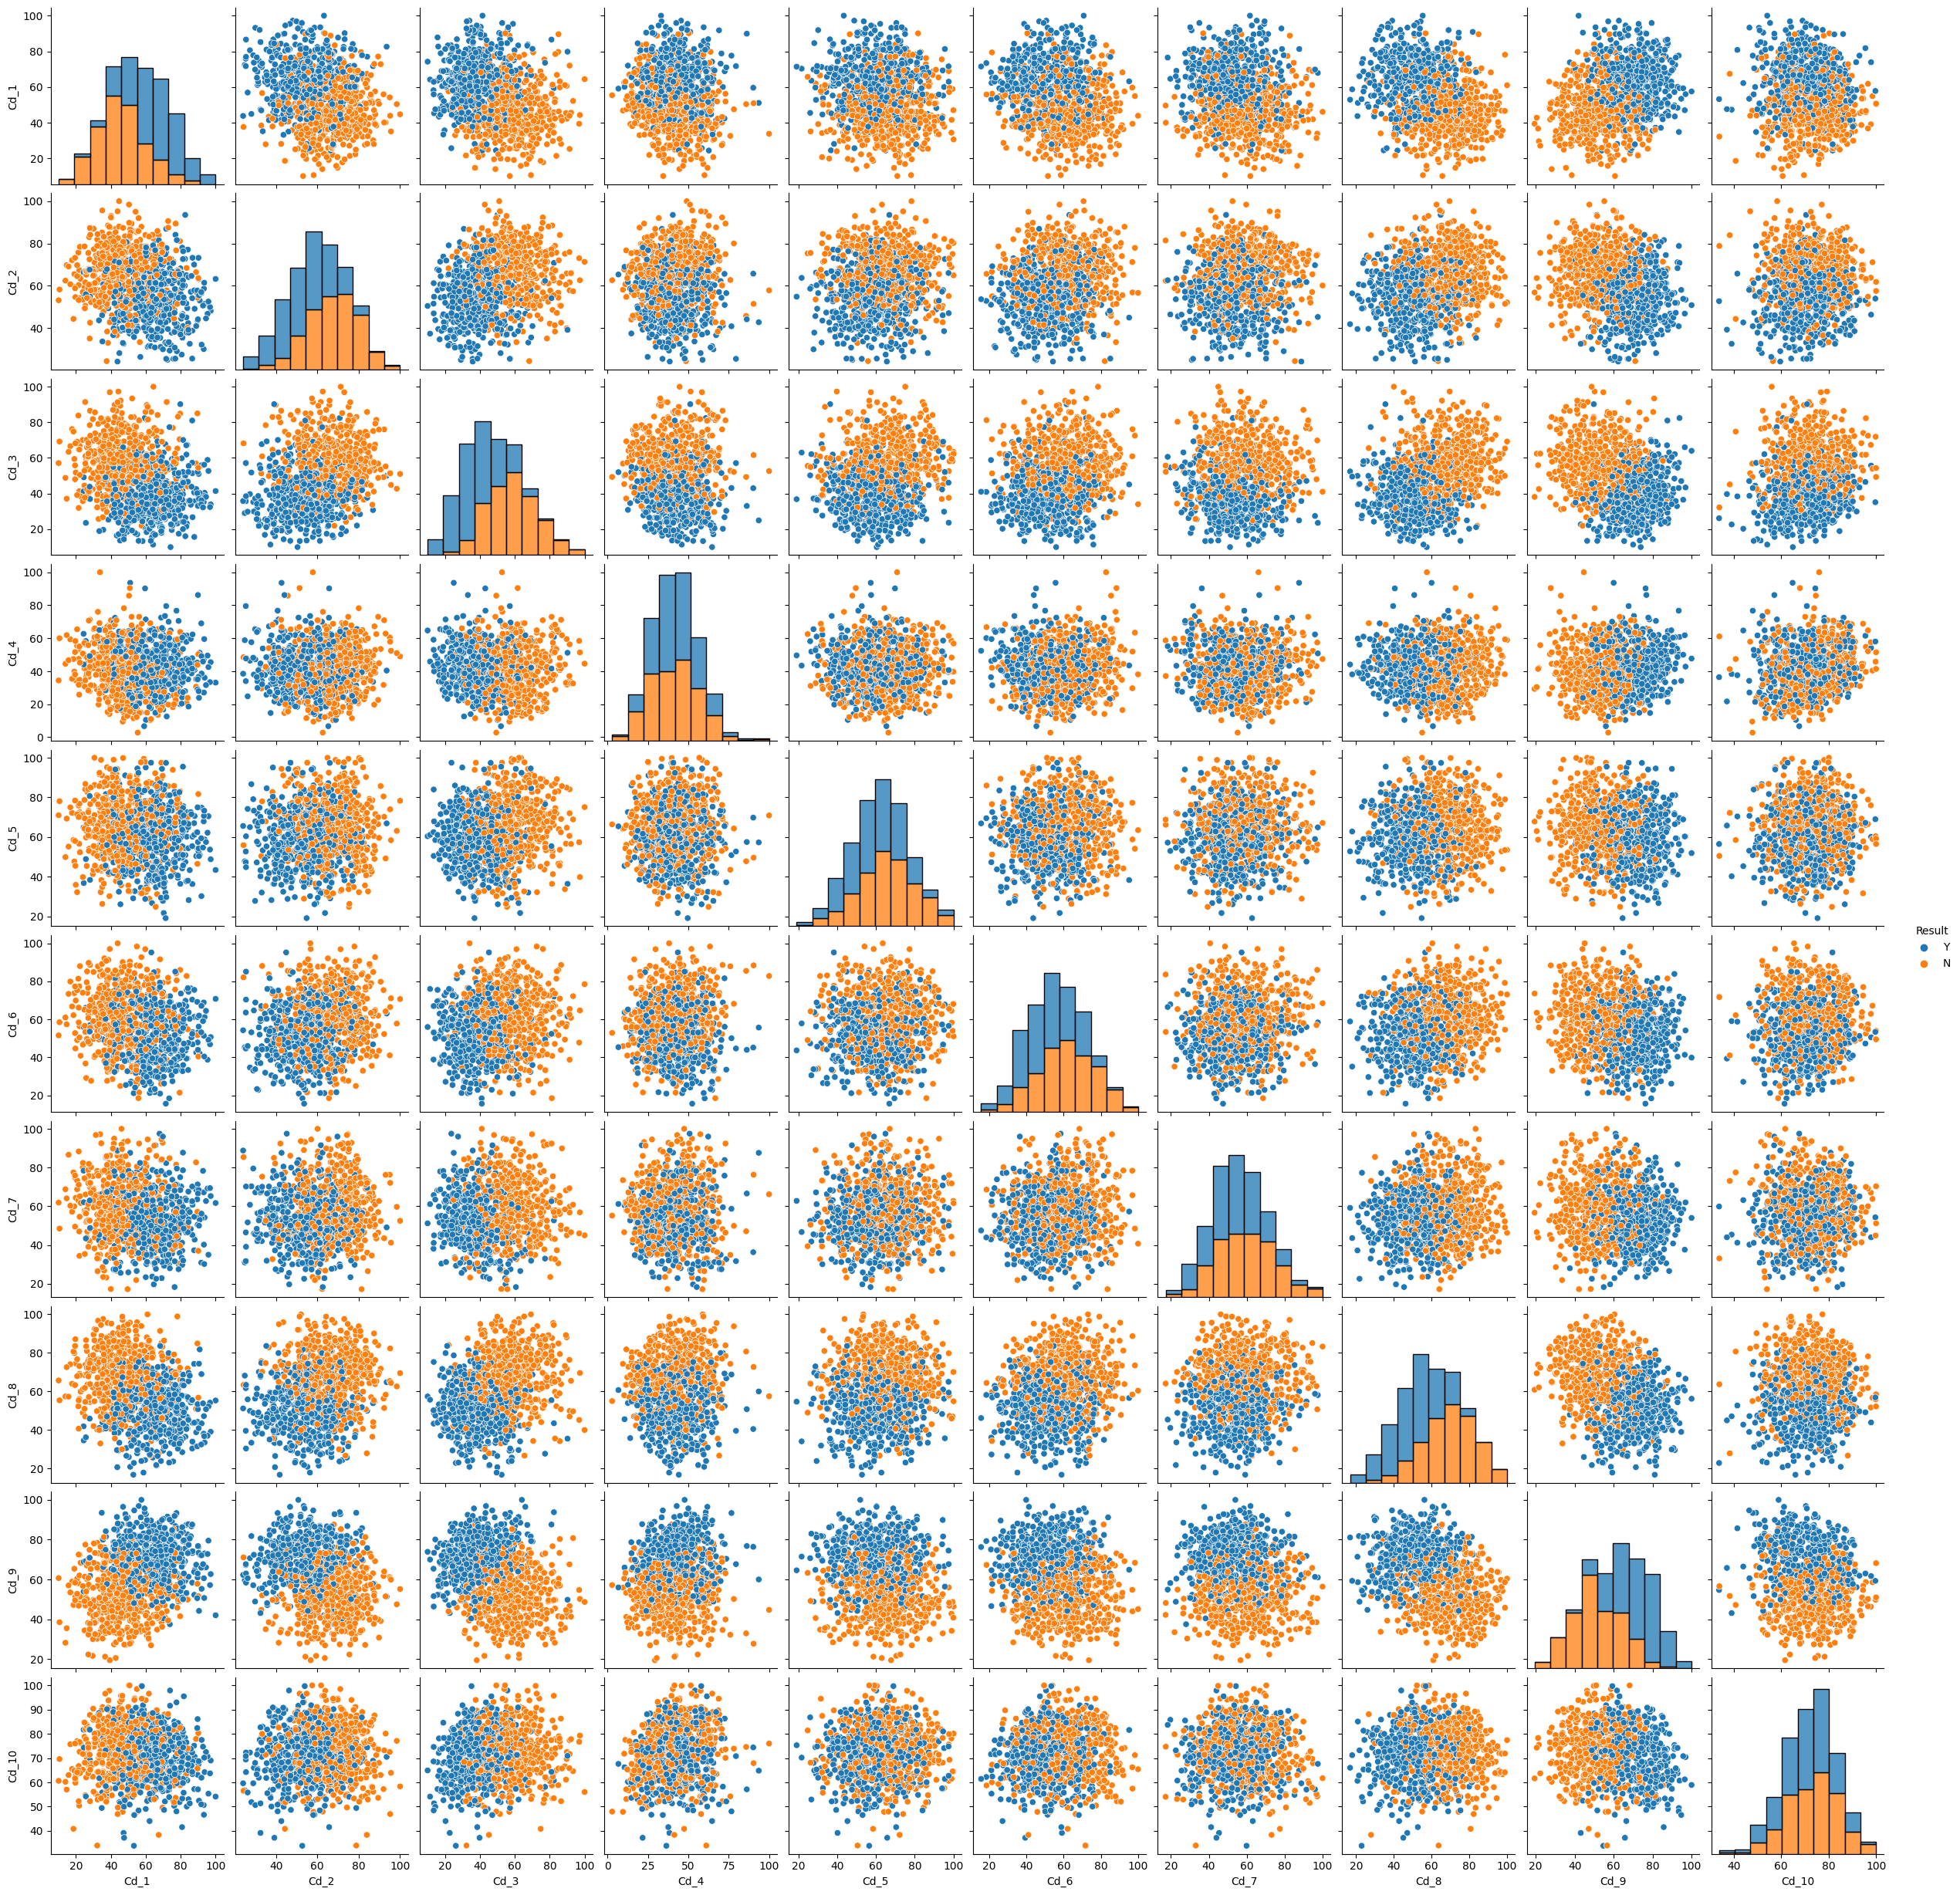

In [14]:
sns.pairplot(data = df, hue = "Result", diag_kind="hist", diag_kws={"bins":10, "multiple":"stack"})

In [15]:
##Standardise the scale using sklearn's standardscalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [16]:
#Split dataset into features and target
target = df['Result']
features = df.drop(labels = "Result", axis = 1)

In [17]:
features.head()

Cd_1  Cd_2  Cd_3  Cd_4  Cd_5  Cd_6  Cd_7  Cd_8  Cd_9  Cd_10
1  53.1  63.4  33.0  46.2  47.3  21.2  44.3  36.1  46.6   65.0
2  36.9  54.7  31.1  50.5  56.0  38.9  39.4  56.8  33.0   78.8
3  41.9  65.5  53.5  52.3  92.5  43.2  94.9  64.7  50.8   67.9
4  71.7  75.6  37.9  50.5  69.2  52.5  82.3  77.3  80.8   60.9
5  74.3  51.8  36.4  40.9  74.7  42.2  65.1  36.2  77.6   74.9

In [18]:
target.head()

1    Y
2    N
3    N
4    Y
5    Y
Name: Result, dtype: object

In [19]:
##fit the features
scalar.fit(features)

StandardScaler()

In [20]:
##Now transform the features using the scalar.transform method
scaled_features = scalar.transform(features)

In [21]:
type(scaled_features)

numpy.ndarray

In [22]:
##Convert scaled_features from an array to a dataframe
df_scaled_features = pd.DataFrame(data = scaled_features, columns=features.columns)

In [23]:
df_scaled_features.head()

Cd_1      Cd_2      Cd_3      Cd_4      Cd_5      Cd_6      Cd_7  \
0 -0.122525  0.187569 -0.911832  0.318653 -1.035516 -2.305940 -0.801865   
1 -1.086028 -0.433403 -1.024151  0.624941 -0.445471 -1.153296 -1.131088   
2 -0.788651  0.337459  0.300034  0.753154  2.030007 -0.873275  2.597862   
3  0.983718  1.058359 -0.622166  0.624941  0.449771 -0.267648  1.751290   
4  1.138354 -0.640394 -0.710839 -0.058864  0.822788 -0.938396  0.595651   

       Cd_8      Cd_9     Cd_10  
0 -1.480070 -0.952562 -0.645366  
1 -0.200556 -1.826218  0.635103  
2  0.287761 -0.682756 -0.376282  
3  1.066595  1.244427 -1.025795  
4 -1.473889  1.038861  0.273232

In [24]:
##Data is now ready for classification
##Start with a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled_features, target, test_size=0.30, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred = knn.predict(X_test)

In [29]:
###Evaluate your model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[134   8]
 [ 12 146]]
              precision    recall  f1-score   support

           N       0.92      0.94      0.93       142
           Y       0.95      0.92      0.94       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [30]:
###This is a good classification 

In [31]:
###Let us try with another value of k
###We can select our k using the Elbow method

err_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error_Rate')

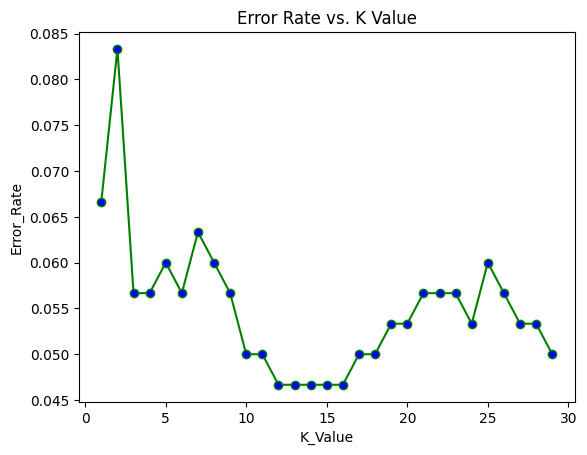

In [34]:
##Plot err_rate vs k
plt.plot(range(1,30), err_rate, color = 'green', marker = 'o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

In [38]:
##Best performance is 12<=k<=16
##Selecting k=12 and evaluate
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
pred_best = knn.predict(X_test)
print('For k = 12')
print('\nConfusion Matrix')
print(confusion_matrix(y_test, pred_best))
print('\nClassification Report')
print(classification_report(y_test, pred_best))

For k = 12

Confusion Matrix
[[136   6]
 [  8 150]]

Classification Report
              precision    recall  f1-score   support

           N       0.94      0.96      0.95       142
           Y       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [39]:
###Save your model for future use using pickle
import pickle
file_name = 'knn_model.sav'

pickle.dump(knn,open(file_name, 'wb')) ##wb means write binary


In [40]:
#How to Load model
loaded_knn = pickle.load(open(file_name, 'rb')) ##rb means read binary

In [43]:
predictions = loaded_knn.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[136   6]
 [  8 150]]
